# Basic matrix math in Computer Vision

In [1]:
from pathlib import Path

import cv2
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [2]:
images_dir = '../assets/examples'
image_samples = [f for f in Path(images_dir).iterdir()]
image_samples

[PosixPath('../assets/examples/fruits.jpg'),
 PosixPath('../assets/examples/seedless_fruits.jpg')]

Image's shape: (408, 612, 3)


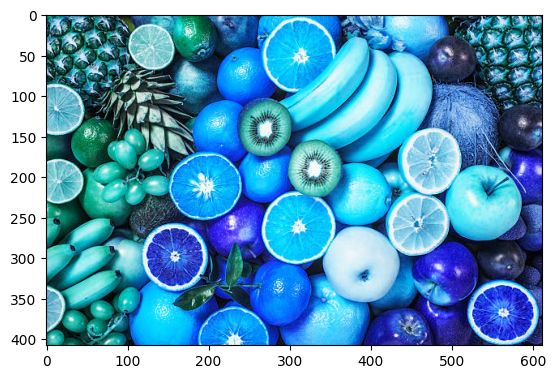

In [3]:
image = cv2.imread(filename=image_samples[0])
image_2 = cv2.imread(filename=image_samples[1])
print(f"Image's shape: {image.shape}")
plt.imshow(image)

Image's shape: (408, 612, 3)


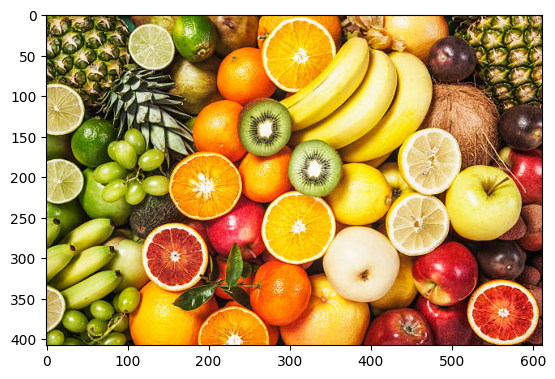

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
print(f"Image's shape: {image.shape}")
plt.imshow(image_rgb)

Image's shape: (408, 612)


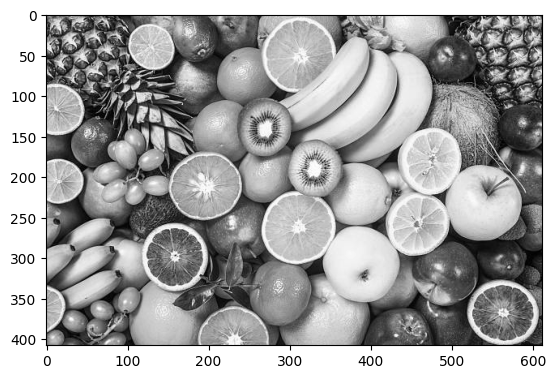

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
print(f"Image's shape: {image_gray.shape}")
# plt.imshow(image_gray)           # => Matplotlib and cv2 use different color mapping  
plt.imshow(image_gray, cmap='gray')  

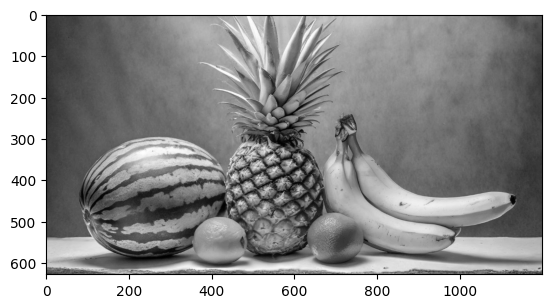

In [6]:
image_gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray_2, cmap='gray')  

Image's shape: (408, 612)


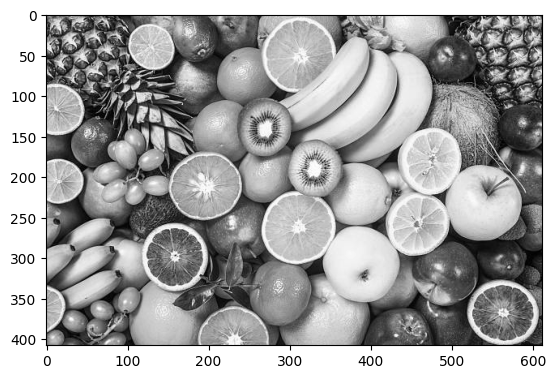

In [7]:
image_gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
print(f"Image's shape: {image_gray.shape}")
# plt.imshow(image_gray)           # => Matplotlib and cv2 use different color mapping  
plt.imshow(image_gray, cmap='gray')  

Image's shape: (408, 612)


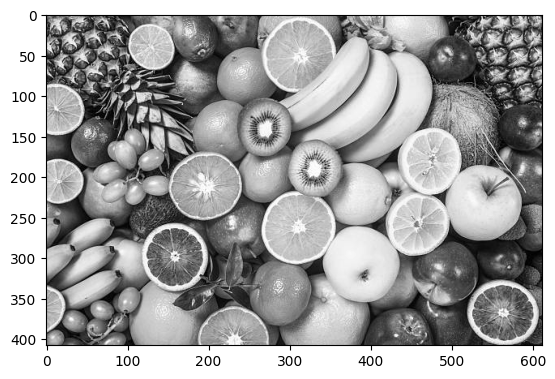

In [8]:
# Another way to read Grayscale
image_gray2 = cv2.imread(image_samples[0], cv2.IMREAD_GRAYSCALE)
print(f"Image's shape: {image_gray2.shape}")
# plt.imshow(image_gray2)           # => Matplotlib and cv2 use different color mapping  
plt.imshow(image_gray2, cmap='gray')  

In [9]:
image_gray

array([[ 73,  75,  92, ..., 117,  80,  68],
       [ 90,  94, 112, ..., 110,  76,  54],
       [ 87, 100, 122, ..., 133,  79,  50],
       ...,
       [123, 126, 134, ...,  82,  62,  50],
       [109, 117, 129, ...,  48,  31,  26],
       [112, 118, 127, ...,  21,  22,  35]], dtype=uint8)

In [10]:
adjust_arr = np.full(image_gray.shape, 120)

adjust_image = np.clip(image_gray + adjust_arr, 0, 255).astype(np.uint8)
adjust_image

array([[193, 195, 212, ..., 237, 200, 188],
       [210, 214, 232, ..., 230, 196, 174],
       [207, 220, 242, ..., 253, 199, 170],
       ...,
       [243, 246, 254, ..., 202, 182, 170],
       [229, 237, 249, ..., 168, 151, 146],
       [232, 238, 247, ..., 141, 142, 155]], dtype=uint8)

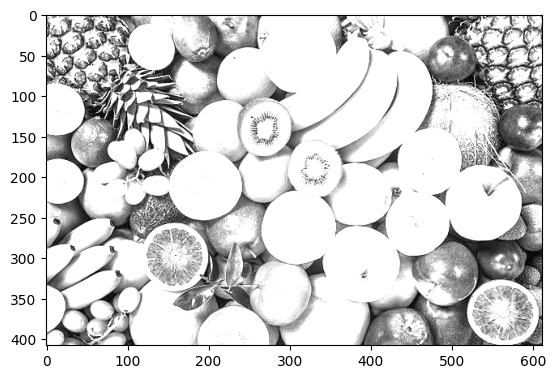

In [11]:
plt.imshow(adjust_image, cmap='grey')

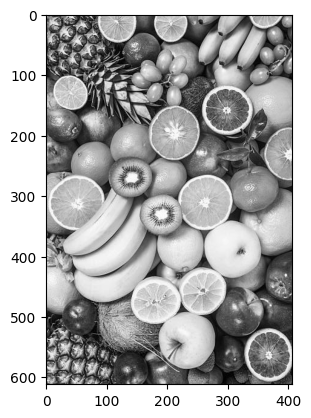

In [12]:
plt.imshow(image_gray.T, cmap='grey')

Image's shape: (408, 612)


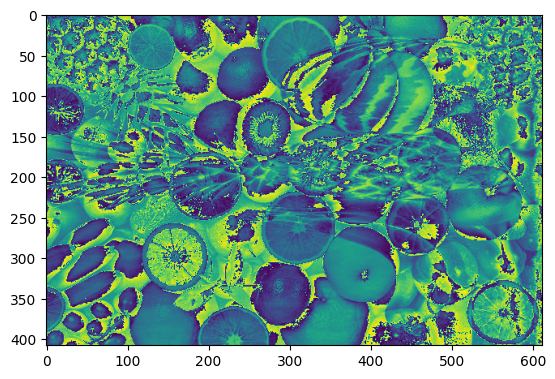

In [13]:
sub_img_gray = np.clip( image_gray - cv2.resize(image_gray_2, image_gray.shape).T, 0, 255)
print(f"Image's shape: {sub_img_gray.shape}")
plt.imshow(sub_img_gray)

Image's shape: (628, 1200)


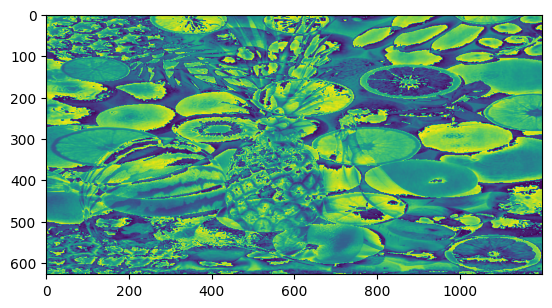

In [14]:
sub_img_gray_2 = np.clip( image_gray_2 - cv2.resize(image_gray, image_gray_2.shape).T, 0, 255)
print(f"Image's shape: {sub_img_gray_2.shape}")
plt.imshow(sub_img_gray_2)

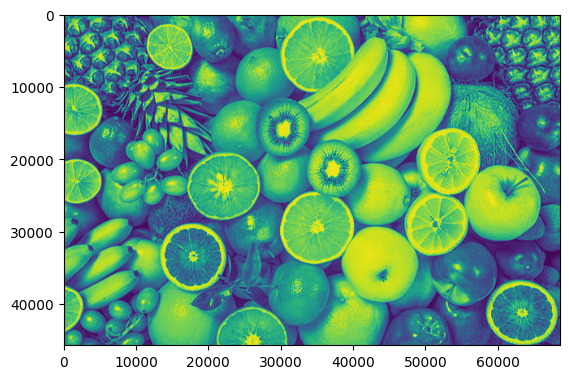

In [20]:
def scale_image(image, scale_x, scale_y):
    """
    Thay đổi kích thước (scale) hình ảnh theo tỉ lệ.

    Args:
        image (numpy.ndarray): Ảnh đầu vào (đọc từ cv2).
        scale_x (float): Hệ số tỉ lệ theo chiều ngang (width).
        scale_y (float): Hệ số tỉ lệ theo chiều dọc (height).

    Returns:
        numpy.ndarray: Ảnh đã được thay đổi kích thước.
    """


    # Lấy kích thước gốc của ảnh
    original_height, original_width = image.shape[:2]
    
    # Tính kích thước mới
    new_width = int(original_width * scale_x)
    new_height = int(original_height * scale_y)
    
    # Thực hiện thay đổi kích thước
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    return resized_image


resize_rgb = scale_image(image_gray, 112, 112)
plt.imshow(resize_rgb)

In [21]:
resize_rgb.shape

(45696, 68544)

In [22]:
def rotate_image(image, angle):
    """
    Xoay hình ảnh quanh tâm một góc nhất định.

    Args:
        image (numpy.ndarray): Ảnh đầu vào.
        angle (float): Góc xoay (theo độ, dương: ngược kim đồng hồ, âm: cùng kim đồng hồ).

    Returns:
        numpy.ndarray: Ảnh đã được xoay.
    """
    # Lấy kích thước gốc của ảnh
    (h, w) = image.shape[:2]
    
    # Tính tâm ảnh
    center = (w // 2, h // 2)
    
    # Tạo ma trận xoay
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    
    # Xoay ảnh
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    
    return rotated_image


def translate_image(image, shift_x, shift_y):
    """
    Tịnh tiến hình ảnh theo chiều ngang và dọc.

    Args:
        image (numpy.ndarray): Ảnh đầu vào.
        shift_x (int): Độ dịch chuyển theo trục X.
        shift_y (int): Độ dịch chuyển theo trục Y.

    Returns:
        numpy.ndarray: Ảnh đã được tịnh tiến.
    """
    # Lấy kích thước ảnh
    (h, w) = image.shape[:2]
    
    # Tạo ma trận tịnh tiến
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    
    # Áp dụng tịnh tiến
    translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
    
    return translated_image

def flip_image(image, flip_code):
    """
    Lật đối xứng hình ảnh.

    Args:
        image (numpy.ndarray): Ảnh đầu vào.
        flip_code (int): 
            - 0: Lật theo trục X (trục ngang).
            - 1: Lật theo trục Y (trục dọc).
            - -1: Lật cả hai trục.

    Returns:
        numpy.ndarray: Ảnh đã được lật.
    """
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

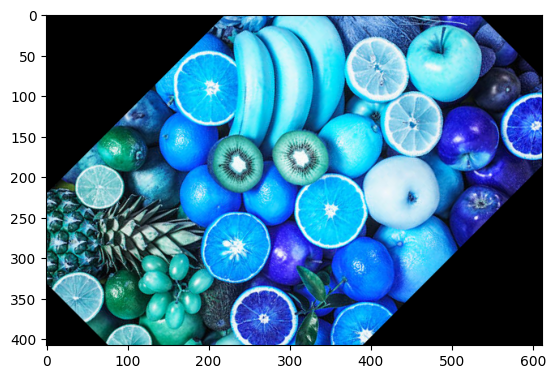

In [24]:
plt.imshow(rotate_image(image, 45), cmap="grey")

## Flip Image

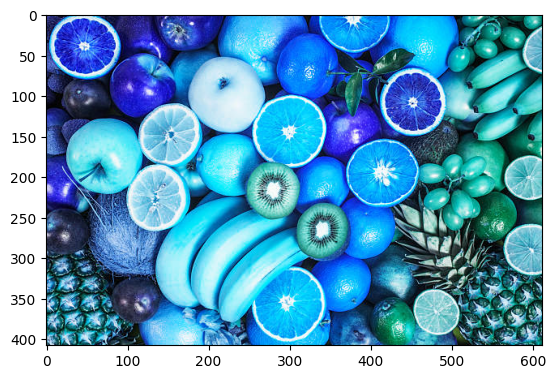

In [25]:
plt.imshow(flip_image(image, -1), cmap='grey')

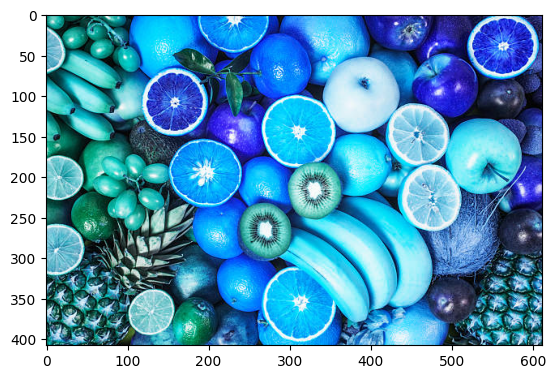

In [26]:
plt.imshow(flip_image(image, 0), cmap='grey')

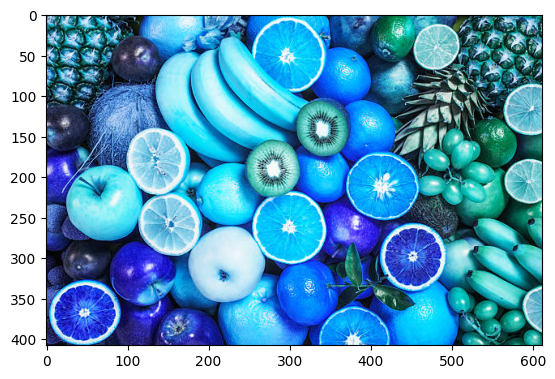

In [27]:
plt.imshow(flip_image(image, 1), cmap='grey')

## Shift Image

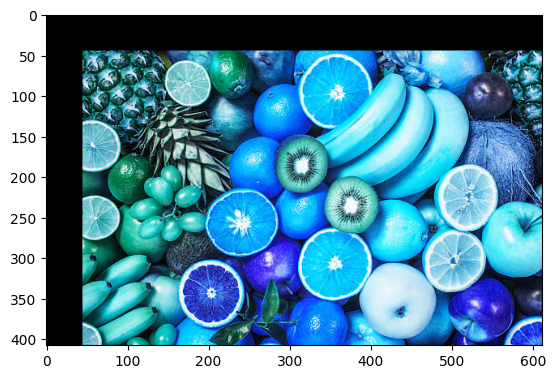

In [28]:
plt.imshow(translate_image(image, 45, 45))

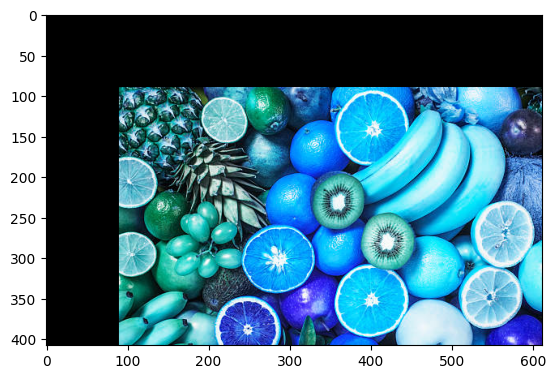

In [29]:
plt.imshow(translate_image(image, 90, 90))